In [1]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline 

##파일 리스트 읽어오기
listOfFiles = glob.glob('lfw1000/*.pgm')
nData = len(listOfFiles)
print("# of files = {}".format(nData))

##이미지 배열로 저장
faces = []
for file in listOfFiles:
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    faces.append(img)
    
faces = np.array(faces) #list -> array=

## 데이터셋 정보 확인하기
print(type(faces))
print(faces.dtype)
print(faces.shape)

# of files = 1071
<class 'numpy.ndarray'>
uint8
(1071, 64, 64)


In [5]:
from sklearn.decomposition import PCA

## 2차원 -> 1차원 벡터 형태로 변환
print("Before reshape = {}".format(faces.shape))

faces = faces.reshape((nData, -1))
print("After reshape = {}".format(faces.shape))

print()

##PCA 적용(정수형 파라미터 입력 -> 사용할 주성분 개수 지정)
pca = PCA(n_components=10)
pca.fit(faces) # 수식 (1)에 해당  𝚺𝐮=𝜆𝐮
eigenVectors = pca.transform(faces) # 수식 (2)에 해당  𝐲=𝐔𝐱
# eigenVectors = pca.fit_transform(faces) --> 위에 두개 한번에
print("shape of eigenVectors  = {}".format(eigenVectors.shape))
print("shape of components = {}".format(pca.components_.shape))
print()
print("explained_variance_ratio = {}".format(pca.explained_variance_ratio_))

Before reshape = (1071, 4096)
After reshape = (1071, 4096)

shape of eigenVectors  = (1071, 10)
shape of components = (10, 4096)

explained_variance_ratio = [0.29378922 0.12629319 0.06304694 0.04017165 0.03541217 0.02161253
 0.01987717 0.01758744 0.01693448 0.01495812]


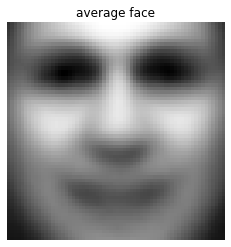

In [6]:
## 평균 얼굴 벡터 시각화해보기
plt.imshow(pca.mean_.reshape((64,64)), cmap='gray')
plt.axis('off')
plt.title('average face')

plt.show()

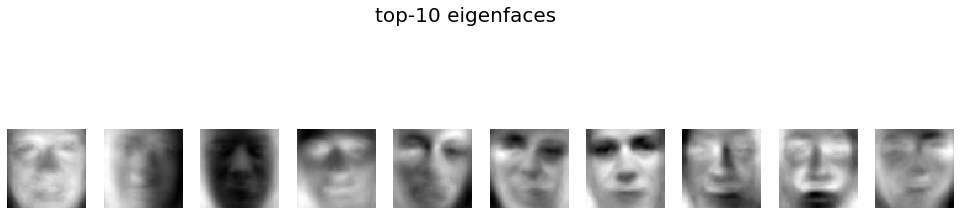

In [15]:
plt.figure(figsize=(17,17))
plt.suptitle('top-10 eigenfaces', fontsize=20)
for i in range(10):
    plt.subplot(10,10,i+1)
    plt.imshow(pca.components_[i].reshape((64,64)), cmap='gray')
    
    plt.axis('off')